## Import Datasets

In [2]:
import pandas as pd
import numpy as np

In [54]:
import os
from scipy.io import wavfile

# Define a custom class to store audio data
class AudioFile:
    def __init__(self, file_name, audio_data, sample_rate, label):
        self.file_name = file_name   # Unique Idenfifier
        self.audio_data = audio_data
        self.sample_rate = sample_rate
        self.label = label

    def __repr__(self):
        return f"AudioFile(file_name={self.file_name}, label={self.label}, sample_rate={self.sample_rate}, audio_data_shape={self.audio_data.shape})"

# Path to the folder containing .wav files
folder_path = "cats_dogs"

# List all .wav files in the folder
wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

# Create a list to store AudioFile objects
audio_objects = []

# Load each .wav file and store as an AudioFile object
for wav_file in wav_files:
    file_path = os.path.join(folder_path, wav_file)
    sr, y = wavfile.read(file_path)  # sr: sample rate, y: audio data
    y = y.astype(np.float32) / np.iinfo(y.dtype).max
    # print(f"Loaded {wav_file} with sample rate {sr} and {len(y)} samples")

    if wav_file.startswith("cat"):
        label = "cat"
    elif wav_file.startswith("dog_barking"):
        label = "dog_barking"
    else:
        label = "None"
    # Create an AudioFile object and store it
    audio_objects.append(AudioFile(wav_file, y, sr, label))

# Check first 5 Audio Files
for audio_object in audio_objects[:5]:
    print(audio_object)

AudioFile(file_name=cat_1.wav, label=cat, sample_rate=16000, audio_data_shape=(179200,))
AudioFile(file_name=cat_10.wav, label=cat, sample_rate=16000, audio_data_shape=(150208,))
AudioFile(file_name=cat_100.wav, label=cat, sample_rate=16000, audio_data_shape=(20696,))
AudioFile(file_name=cat_101.wav, label=cat, sample_rate=16000, audio_data_shape=(184000,))
AudioFile(file_name=cat_102.wav, label=cat, sample_rate=16000, audio_data_shape=(182400,))


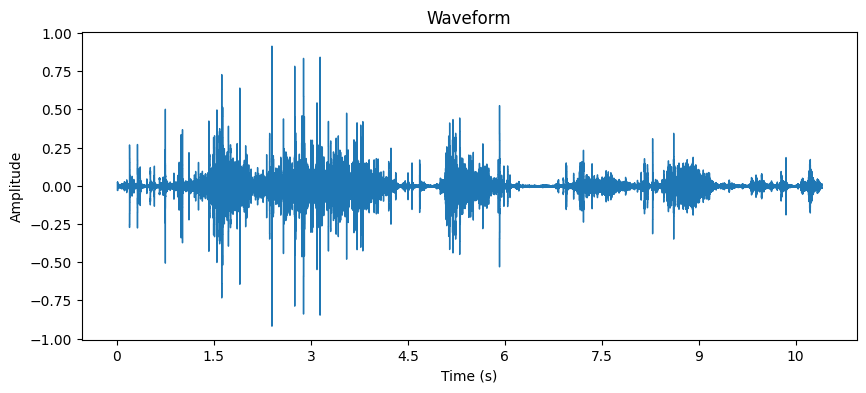

In [51]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

sample = audio_objects[100]

y = sample.audio_data
sr = sample.sample_rate

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()